<a href="https://colab.research.google.com/github/Projas-14/Metodos_numericos/blob/master/Metodos%20numericos%202.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Integrantes:
Javier Marín

Paul Rojas

Javiera Cabrera

Sofía Labra

### **1.** Regresión Lineal Simple y Múltiple:
Una universidad en EEUU quiere hacer un estudio de como se relacionan las notas de las 3 pruebas del
semestre con la nota final del examen. Para ello cuentan con 25 datos del semestre pasado. Encontrar
el modelo de regresión lineal m´ultiple para realizar esta tarea. (Ejemplo real y se llama “Test Scores for
General Psychology”. Descargue el archivo mlr03.xls)
Primero realice una regresi´on lineal simple, en donde utilice la nota de la primera prueba como
variable independiente y la nota del examen como la dependiente. Muestre en un gr´afico los datos
y la recta que se genera.
Luego implemente la regresión lineal múltiple con todos los datos.
Verifique la calidad de los modelos calculando la medida de desempeño r
2
. Debe calcular la métrica de
desempeño para cada uno de los problemas.


In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

Creamos el data frame de mlr03

In [ ]:
df = pd.read_csv('mlr03.csv',  sep=';')

In [ ]:
# Funcion Regresion Lineal Simple
def lineal(xi, a1, a0):
  return ((xi * a1) + a0)

# Funcion para calcular la suma de una multiplicacion
def multiplicar(datos1, datos2):
  sumatoria = 0

  for i in range(0, 25):
    num = (datos1[i]) * (datos2[i])
    sumatoria = sumatoria + num

  return sumatoria

In [ ]:
# Lista de los 'Y' obtenidos de la funcion de Regresion Lineal Simple
f = []

y = df['FINAL'].tolist() # Variable Dependiente
x = df['EXAM1'].tolist() # Variable Independiente

n = len(x) # Cantidad de datos
sum_x = sum(x) # Sumatoria de los 'X'
sum_y = sum(y) # Sumatoria de los 'Y'

#-------------------#
# Sumatoria de (X^2) o (X * X)
sum_x2 = multiplicar(x, x)
# Sumatoria de (X * Y)
sum_xy = multiplicar(x, y)

prom_y = sum_y/n

ST_S = 0
SR_S = 0


# valor de a1 y a2
a1 = (n * sum_xy - sum_x * sum_y)/(n * sum_x2 - sum_x**2)
a0 = (sum_y/n) - a1 * (sum_x/n)



# Calculo de ST
for i in range(n):
  SR_S += (y[i] - a0 - a1 * x[i])**2
  ST_S += (y[i] - prom_y)**2
  f.append(lineal(x[i], a1, a0))


# R^2
R2 = (ST_S - SR_S)/ST_S

# print R^2
print("  R^2 = " + str(R2))

  R^2 = 0.8950500188020497


Tenemos $R^2$ es 0.8950500188020497 debido que sabemos que $r^2 > 0.7$ tenemos qu es fuertemente correlacionada con la variable dependiente.

In [ ]:
tabla = pd.DataFrame({'X': x, 'f(X)':f})
tabla

,X,f(X)
0,73,150.851173
1,93,187.900270
2,89,180.490450
3,96,193.457634
4,73,150.851173
5,53,113.802076
6,69,143.441353
7,47,102.687347
8,87,176.785541
9,79,161.965902


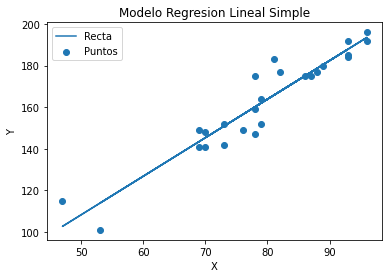

In [ ]:
# Genero la grafica

plt_x = np.linspace(0,100,100)
plt.plot(x, f)
plt.scatter(x, y)
plt.title("Modelo Regresion Lineal Simple")
plt.legend(["Recta", "Puntos"])
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

 Regresión lineal múltiple

In [ ]:
def regresion_lineal_multiple(x1,x2,x3,y,n):
  #Sumas inicializadas en 0
  #suma de x1,x2,x3
  suma_X1 = 0
  suma_X2 = 0
  suma_X3 = 0
  #suma de 1x1 ; x1x2 ; x1x2
  suma_X1x1 = 0
  suma_X1x2 = 0
  suma_X1x3 = 0
  #suma de x2x2 ; x2x3
  suma_X2x2 = 0
  suma_X2x3 = 0
  #x3x3
  suma_X3x3 = 0

  #suma y ; suma y*x1 ; suma y*x2 ; suma y*x3

  suma_y = 0
  suma_yx1 = 0
  suma_yx2 = 0
  suma_yx3 = 0



  for i in range(n):
    #suma de x1,x2,x3
    suma_X1 += x1[i]
    suma_X2 += x2[i]
    suma_X3 += x3[i]
    #suma de 1x1 ; x1x2 ; x1x2
    suma_X1x1 += x1[i] * x1[i]
    suma_X1x2 += x1[i] * x2[i]
    suma_X1x3 += x1[i] * x3[i]
    #suma de x2x2 ; x2x3
    suma_X2x2 += x2[i] * x2[i]
    suma_X2x3 += x2[i] * x3[i]
    #x3x3
    suma_X3x3 += x3[i] * x3[i]
    #suma y ; suma y*x1 ; suma y*x2 ; suma y*x3
    suma_y += y[i]
    suma_yx1 += y[i]*x1[i]
    suma_yx2 += y[i]*x2[i]
    suma_yx3 += y[i]*x3[i]

  promedio_y = suma_y/n

  #creamos la matrix de la regresion lineal multiple A y B traspuesta
  A = np.matrix([[n, suma_X1, suma_X2, suma_X3],
                 [suma_X1, suma_X1x1, suma_X1x2, suma_X1x3],
                 [suma_X2, suma_X1x2, suma_X2x2, suma_X2x3],
                 [suma_X3, suma_X1x3, suma_X2x3, suma_X3x3]],
                 dtype=float)

  B = np.array([suma_y, suma_yx1, suma_yx2, suma_yx3], dtype=float).T

  #resolvemos A*X=B donde X ={a0,a1,a2,a3}

  X = np.linalg.solve(A, B)
  a0 = X[0]
  a1 = X[1]
  a2 = X[2]
  a3 = X[3]

  ST_M = 0
  SR_M = 0


  for i in range(n):
    ST_M += (y[i] - promedio_y)**2
    SR_M += (y[i] - a0 - a1 * x1[i] - a2 * x2[i] - a3 * x3[i])**2

  #calculamos r^2
  r2 = (ST_M - SR_M)/ST_M

  print(f"a0 = {a0}")
  print(f"a1 = {a1}")
  print(f"a2 = {a2}")
  print(f"a3 = {a3}")

  return(f"el valor de r^2 es {r2}")

x1 = df['EXAM1'].tolist()
x2 = df['EXAM2'].tolist()
x3 = df['EXAM3'].tolist()
y  = df['FINAL'].tolist()

regresion_lineal_multiple(x1,x2,x3,y,len(x1))

a0 = -4.3361024012398675
a1 = 0.3559382186618588
a2 = 0.5425187576186773
a3 = 1.1674442162822052


'el valor de r^2 es 0.9896615789448399'

Tenemos $R^2$ es 0.9896615789448399 debido que sabemos que $r^2 > 0.7$ tenemos qu es fuertemente correlacionada con la variable dependiente.

###2. Dados los puntos de la forma (x;f(x)) siguientes: [(1;0) (2;5) (2.5;6.5) (3;7) (4;3) (5;1)]. Calcule f(3,4) usando interpolación polinomial de Newton de ordenes 1 a 3. Encuentre la secuencia de puntos parasus estimados para obtener el mejor resultado. Esto es, los puntos deberian estar centrados y lo más cerca del valor desconocido.

Newton:

In [ ]:
import math
import pandas as pd

def newton(x,y, valor):
  i = len(x)
  k = 0
  fx2_x1 = []
  fx3_x2_x1 = []
  fx4_x3_x2_x1 = []
  fx5_x4_x3_x2_x1 = []
  fx6_x5_x4_x3_x2_x1 =[]

  for k in range(len(x)):
       #x1
    if(k == 0):
      for j in range(i):
        if(j == i - 1):
          resp = "-"
        else:
          yy = y[j + 1] - y[j]
          xx = x[j + 1] - x[j]
          resp = yy/xx
        fx2_x1.append(resp)

    if(k == 1):
      for j in range(i - 2):
          yy = fx2_x1[j + 1] - fx2_x1[j]
          xx = x[j + 2] - x[j]
          resp = yy/xx
          fx3_x2_x1.append(resp)

      for j in range(2):
        resp = "-"
        fx3_x2_x1.append(resp)

    if(k == 2):
      for j in range(i - 3):
        yy = fx3_x2_x1[j + 1] - fx3_x2_x1[j]
        xx = x[j + 3] - x[j]
        resp = yy/xx
        fx4_x3_x2_x1.append(resp)

      for j in range(3):
        resp = "-"
        fx4_x3_x2_x1.append(resp)

    if(k == 3):
      for j in range(i - 4):
        yy = fx4_x3_x2_x1[j + 1] - fx4_x3_x2_x1[j]
        xx = x[j + 4] - x[j]
        resp = yy/xx
        fx5_x4_x3_x2_x1.append(resp)

      for j in range(4):
        resp = "-"
        fx5_x4_x3_x2_x1.append(resp)

    if(k == 4):
      for j in range(i - 5):
        yy = fx5_x4_x3_x2_x1[j + 1] - fx5_x4_x3_x2_x1[j]
        xx = x[j + 5] - x[j]
        resp = yy/xx
        fx6_x5_x4_x3_x2_x1.append(resp)

      for j in range(5):
        resp = "-"
        fx6_x5_x4_x3_x2_x1.append(resp)


  print("Tabla Newton:\n")
  tabla = pd.DataFrame({'x': x, 'f(x)': y, 'f(x2)' : fx2_x1, 'f(x3)' : fx3_x2_x1, 'f(x4)' : fx4_x3_x2_x1, 'f(x5)': fx5_x4_x3_x2_x1, 'f(x6)': fx6_x5_x4_x3_x2_x1 })
  print(tabla)
  a = valor - x[0]
  b = valor - x[1]
  c = valor - x[2]
  d = valor - x[3]
  e = valor - x[4]
  f1 =  y[0] + (a*fx2_x1[0])
  f2 =  y[0] + (a*fx2_x1[0]) + (a*b*fx3_x2_x1[0])
  f3 =  y[0] + (a*fx2_x1[0]) + (a*b*fx3_x2_x1[0]) + (a*b*c*fx4_x3_x2_x1[0])
  sum = f1 + f2 + f3
  print("\nEl valor de f1 es = ", f1)
  print("\nEl valor de f2 es = ", f2)
  print("\nEl valor de f3 es = ", f3)
  print("\nEl valor de las ordenes de 1 a 3 es = ", sum)
  f5  = y[0] + (a*fx2_x1[0]) + (a*b*fx3_x2_x1[0]) + (a*b*c*fx4_x3_x2_x1[0]) + (a*b*c*d*fx5_x4_x3_x2_x1[0]) + (a*b*c*d*e*fx6_x5_x4_x3_x2_x1[0])
  print("\nEl valor de f5 es = ", f5)

x = [1, 2, 2.5, 3, 4, 5]
y = [0, 5, 6.5, 7, 3, 1]
valor = 3.4
newton(x,y, valor)

Tabla Newton:

     x  f(x) f(x2)     f(x3)     f(x4)     f(x5)     f(x6)
0  1.0   0.0   5.0 -1.333333 -0.333333 -0.111111  0.227778
1  2.0   5.0   3.0      -2.0 -0.666667       0.8         -
2  2.5   6.5   1.0 -3.333333  1.733333         -         -
3  3.0   7.0  -4.0       1.0         -         -         -
4  4.0   3.0  -2.0         -         -         -         -
5  5.0   1.0     -         -         -         -         -

El valor de f1 es =  12.0

El valor de f2 es =  7.5200000000000005

El valor de f3 es =  6.5120000000000005

El valor de las ordenes de 1 a 3 es =  26.032

El valor de f5 es =  6.212288


Lagrange:

In [ ]:
# Interpolacion de Lagrange
import numpy as np
import sympy as sym
import matplotlib.pyplot as plt

# INGRESO DE DATOS
xi = [1.0, 2, 2.5, 3, 4, 5]
fi = [0, 5, 6.5, 7, 3, 1]


# Polinomio de Lagrange
def lagrange(a,xi,yi,orden):
  polinomio = 0
  for i in range(orden):
      # Termino de Lagrange
      numerador = 1
      denominador = 1
      for j  in range(orden):
          if (j!=i):
              numerador = numerador*(a-xi[j])
              denominador = denominador*(xi[i]-xi[j])
      terminoLi = numerador/denominador
      polinomio = polinomio + terminoLi*fi[i]

  return polinomio


# SALIDA

x = sym.Symbol('x')
print("Polinomio de Lagrange:")
print(lagrange(x,xi,fi,len(xi)))
print()
resultados = []
orden = 3
for i in range(orden):
  resultados.append(lagrange(3.4,xi,fi,i+2))

print("Orden 1:", resultados[0],"\n")

print("Orden 2:", resultados[1],"\n")
print("Orden 3:", resultados[2])





Polinomio de Lagrange:
1.66666666666667*(x - 5)*(x - 4)*(x - 3)*(x - 2.5)*(x - 1.0) - 4.62222222222222*(x - 5)*(x - 4)*(x - 3)*(x - 2)*(x - 1.0) + 3.5*(x - 5)*(x - 4)*(x - 2.5)*(x - 2)*(x - 1.0) - 0.333333333333333*(x - 5)*(x - 3)*(x - 2.5)*(x - 2)*(x - 1.0) + 0.0166666666666667*(x - 4)*(x - 3)*(x - 2.5)*(x - 2)*(x - 1.0)

Orden 1: 12.0 

Orden 2: 7.52 

Orden 3: 6.511999999999997


### 3. Utilice la regla trapezoidal de 4 segmentos $(n = 4)$ para estimar la integral de:

$f(x)=0.2+25x-200x^2+675x^3-900x^4+400x^5$

desde $a=0$ a $b=0.8$

In [ ]:
# Integración: Regla de los trapecios
# Usando una función fx()
import numpy as np
import matplotlib.pyplot as plt
import math


fx = lambda x: 0.2 + 25*x -200*(math.pow(x,2)) + 675*(math.pow(x,3)) - 900*(math.pow(x,4)) + 400*(math.pow(x,5))


# intervalo de integración
a = 0
b = 0.8
segmentos = 4

# Se considera que los intervalos tienen el mismo rango
h = (b-a)/segmentos #h corresponde a la base de los trapecios
xi = a
suma = fx(xi)
#se calcula el valor para cada uno de los segmentos y se suman
for i in range(0,segmentos-1,1):
    xi = xi + h
    suma = suma + 2*fx(xi)
suma = suma + fx(b)

area = h*(suma/2)

# Valores obtenidos
print("segmentos: ", segmentos)
print("Integral estimada: ", area)


segmentos:  4
Integral estimada:  1.484800000000007
